In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

# Part 1 - Exploratory Data Analysis

In [2]:
df = pd.read_json('data\logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.shape

(93142, 1)

In [4]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [5]:
min(df.login_time), max(df.login_time), (max(df.login_time.dt.date) - min(df.login_time.dt.date) + timedelta(days=1)).days


(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'), 103)

In [6]:
# add a new column 'count' into df and set login_time as an index
df['count'] = 1
df.set_index('login_time', inplace = True)
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [7]:
# resample the data into 15min intervals
count_per_15min = df.resample('15T').sum()
count_per_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


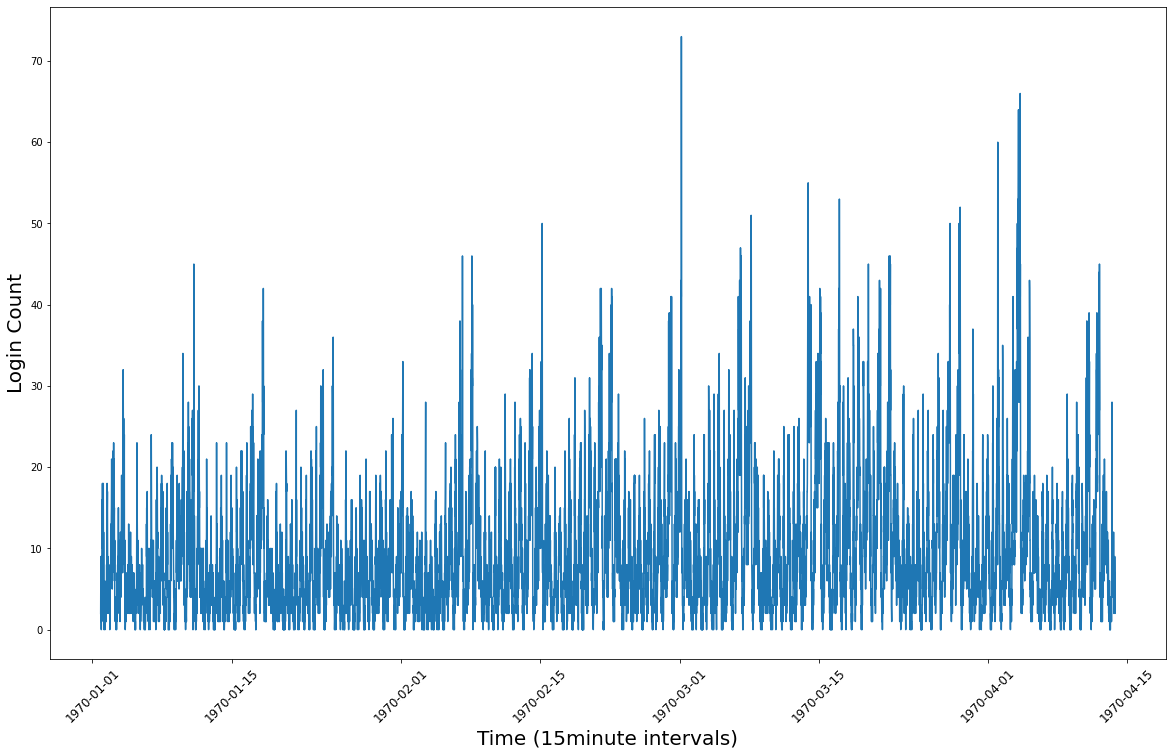

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(count_per_15min)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Time (15minute intervals)', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.show()

In [9]:
# resample data into 1hour bins
count_per_hour = df.resample('1H').sum()
count_per_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


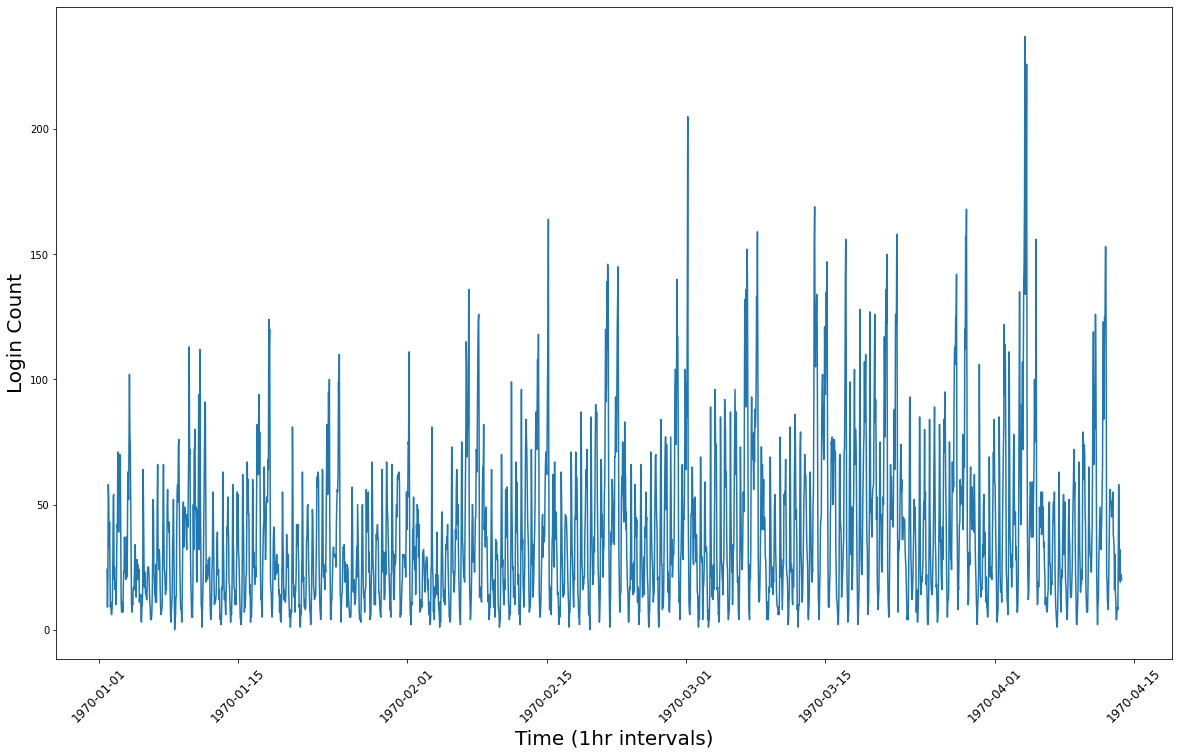

In [10]:
plt.figure(figsize=(20, 12))
plt.plot(count_per_hour)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Time (1hr intervals)', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.show()

In [11]:
# resample data into 1day bins
count_per_day = df.resample('1D').sum()
count_per_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


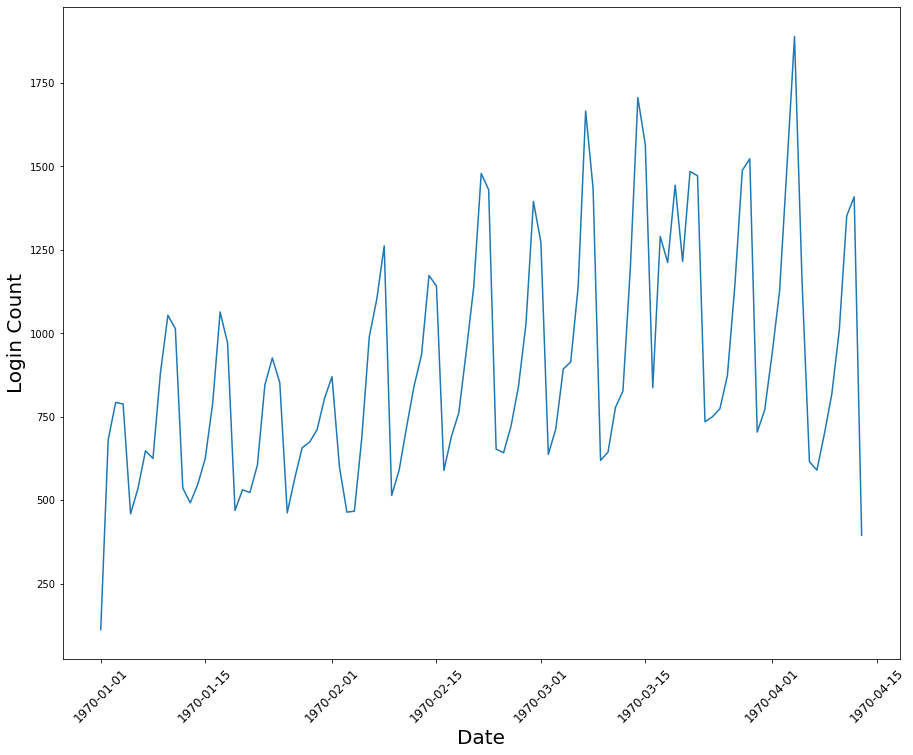

In [12]:
plt.figure(figsize=(15, 12))
plt.plot(count_per_day)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.show()

In [13]:
# add a new column 'Day_of_Week'to store day of week information
count_per_day['Day_of_Week']= count_per_day.index.dayofweek
count_per_day.head()

,count,Day_of_Week
login_time,,
1970-01-01,112,3
1970-01-02,681,4
1970-01-03,793,5
1970-01-04,788,6
1970-01-05,459,0


In [14]:
# Average count of logins in each day of week
day_of_week_avg_count = count_per_day.groupby('Day_of_Week').mean()
day_of_week_avg_count

,count
Day_of_Week,
0,588.200000
1,662.000000
2,738.500000
3,797.333333
4,1013.866667
5,1291.800000
6,1211.133333


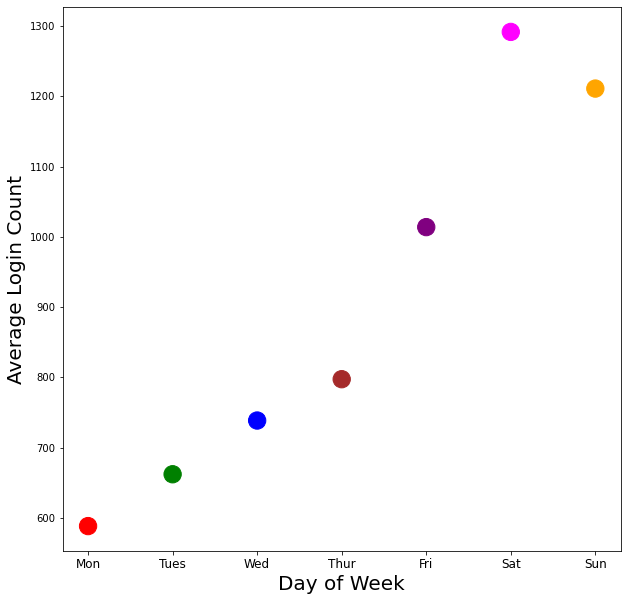

In [15]:
colors = np.array(['red', 'green', 'blue', 'brown', 'purple','magenta','orange'])
plt.figure(figsize=(10, 10))
plt.scatter(x=np.array(day_of_week_avg_count.index), y = np.array(day_of_week_avg_count['count']), c=colors, s=300)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], fontsize=12)
plt.ylabel('Average Login Count', fontsize = 20)
plt.xlabel('Day of Week', fontsize = 20)
plt.show()

Obviously, Saturday has the highest average login count, Sunday the second and Friday the third.

In [16]:
count_per_day['Day'] = count_per_day.index.strftime('%A')
count_per_day.head()

,count,Day_of_Week,Day
login_time,,,
1970-01-01,112,3,Thursday
1970-01-02,681,4,Friday
1970-01-03,793,5,Saturday
1970-01-04,788,6,Sunday
1970-01-05,459,0,Monday


In [17]:
count_per_day.reset_index(inplace=True)
count_per_day.head()

,login_time,count,Day_of_Week,Day
0,1970-01-01,112,3,Thursday
1,1970-01-02,681,4,Friday
2,1970-01-03,793,5,Saturday
3,1970-01-04,788,6,Sunday
4,1970-01-05,459,0,Monday


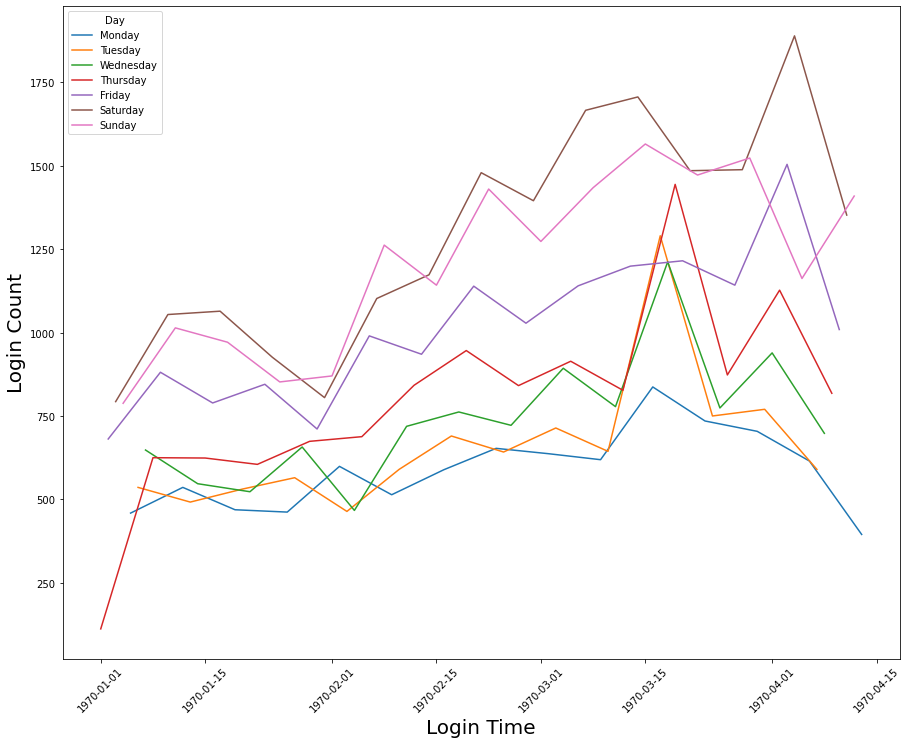

In [18]:
plt.figure(figsize=(15, 12))
sns.lineplot(x='login_time', y = 'count', hue='Day', hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
                                                                  'Friday', 'Saturday', 'Sunday'], data = count_per_day)
plt.xticks(rotation=45)
plt.xlabel('Login Time', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.show()

# Obviously, Saturday has the highest average login count, Sunday the second and Friday the third.

# Part 2 - Answer is in the report

# Part 3 - Predictive Modeling

In [19]:
ultimate_df = pd.read_json('data\\ultimate_data_challenge.json')
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
ultimate_df.shape

(50000, 12)

In [21]:
ultimate_df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [22]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


# 3.1 - Data cleaning

In [23]:
ultimate_df.avg_rating_of_driver.unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [24]:
ultimate_df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [25]:
ultimate_df.avg_rating_by_driver.unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, nan, 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [26]:
np.min(ultimate_df.signup_date), np.max(ultimate_df.signup_date)

('2014-01-01', '2014-01-31')

In [27]:
np.min(ultimate_df.last_trip_date), np.max(ultimate_df.last_trip_date)

('2014-01-01', '2014-07-01')

In [28]:
ultimate_df[ultimate_df.phone.isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,NaN,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


In [29]:
# convert categorical column phone to numeric: 0, 1
# 0 - phone is not the primary device of the user, 1 -phone is the primary device ofthe user
ultimate_df['phone'] = ultimate_df['phone'].apply(lambda x: 1 if x=='iPhone' or x == 'Android' else 0)
ultimate_df['phone'].unique()

array([1, 0], dtype=int64)

In [30]:
#fill na in avg_rating_of_driver with mean value
ultimate_df['avg_rating_of_driver'].fillna(round(ultimate_df['avg_rating_of_driver'].mean(), 1), inplace=True)
ultimate_df['avg_rating_of_driver'].unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, 4.5, 4. , 3.9, 4.9, 4.8, 2.5, 3.7,
       1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2, 2.6,
       3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [31]:
#fill na in avg_rating_by_driver with mean value
ultimate_df['avg_rating_by_driver'].fillna(round(ultimate_df['avg_rating_by_driver'].mean(), 1), inplace=True)
ultimate_df['avg_rating_by_driver'].unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, 4.4, 4.6, 3.7, 4.3, 3.5,
       2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8, 1.5,
       2.7])

In [32]:
# convert type signup_date and last_trip_date to datetime
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

In [33]:
# convert column ultimate_black_user type from boolean to numeric
ultimate_df['ultimate_black_user'] = np.where(ultimate_df['ultimate_black_user'] == True, 1, 0)
ultimate_df['ultimate_black_user'].unique()

array([1, 0])

In [34]:
ultimate_df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                              int64
surge_pct                        float64
ultimate_black_user                int32
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

# 3.2 - EDA

In [35]:
# latest last trip date
snapshot_date = max(ultimate_df.last_trip_date) + timedelta(days=1)
snapshot_date

Timestamp('2014-07-02 00:00:00')

In [36]:
# users are retained in their 6th month on system
ultimate_df['retained'] = ultimate_df['last_trip_date']>= pd.to_datetime('2014-06-01')
ultimate_df['retained'] =  np.where(ultimate_df['retained'], 1, 0)
ultimate_df['retained'].head()


0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int32

In [37]:
ultimate_df['retained'].count()

50000

In [38]:
ultimate_df['retained'] .value_counts()

0    31196
1    18804
Name: retained, dtype: int64

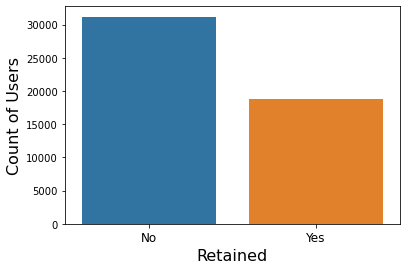

In [39]:
sns.countplot(x = 'retained', data = ultimate_df)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.xlabel('Retained', fontsize = 16)
plt.ylabel('Count of Users', fontsize = 16)
plt.show()

In [40]:
ultimate_df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

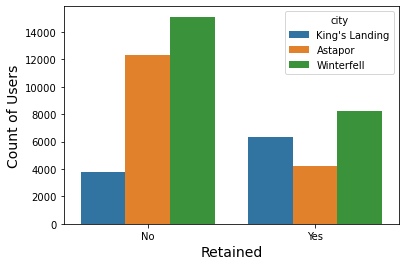

In [41]:
sns.countplot(x = 'retained', data = ultimate_df, hue='city')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Retained', fontsize=14)
plt.ylabel('Count of Users', fontsize=14)
plt.show()

In [42]:
# retaining rate in total
retaining_rate = ultimate_df[ultimate_df.retained == 1]['retained'].count()/ultimate_df.shape[0]
print('{0:.2f}%'.format(retaining_rate*100))

37.61%


In [43]:
# retaining rate by city
retaining_rate_by_city = ultimate_df[ultimate_df.retained == 1].groupby('city')['retained'].count() \
                        /ultimate_df.groupby('city')['retained'].count()
print(retaining_rate_by_city.apply(lambda x: str(round(x*100, 2))+'%'))

city
Astapor           25.57%
King's Landing    62.81%
Winterfell        35.19%
Name: retained, dtype: object


Obviously, which city the users signed up in makes difference in retention rate.

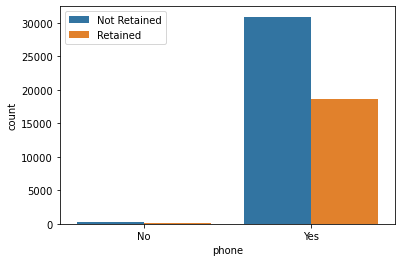

In [44]:
sns.countplot(x = 'phone', data = ultimate_df, hue='retained')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['Not Retained', 'Retained'])

In [45]:
# retaining rate by phone
retaining_rate_by_phone = ultimate_df[ultimate_df.retained == 1].groupby('phone')['retained'].count() \
                        /ultimate_df.groupby('phone')['retained'].count()
print(retaining_rate_by_phone.apply(lambda x: str(round(x*100, 2))+'%'))

phone
0    33.59%
1    37.64%
Name: retained, dtype: object


In [46]:
# retaining rate by whether the users are ultimate black users
retaining_rate_by_ultimate_black_user = ultimate_df[ultimate_df.retained == 1].groupby('ultimate_black_user')['retained'].count() \
                        /ultimate_df.groupby('ultimate_black_user')['retained'].count()
print(retaining_rate_by_ultimate_black_user.apply(lambda x: str(round(x*100, 2))+'%'))

ultimate_black_user
0    29.88%
1    50.37%
Name: retained, dtype: object


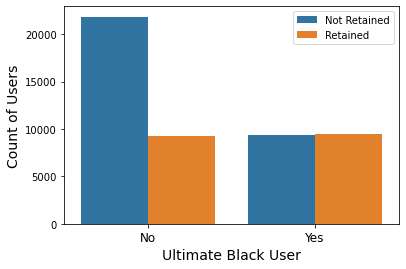

In [47]:
sns.countplot(x = 'ultimate_black_user', data = ultimate_df, hue='retained')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.legend(['Not Retained', 'Retained'])
plt.xlabel('Ultimate Black User', fontsize = 14)
plt.ylabel('Count of Users', fontsize = 14)
plt.show()

In [48]:
ultimate_df['trips_in_first_30_days'].value_counts()

0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
37         9
33         9
32         8
31         6
44         5
40         5
43         4
38         4
39         3
36         3
47         3
42         3
53         2
48         2
49         2
55         2
35         2
54         2
56         2
71         1
73         1
125        1
41         1
50         1
63         1
51         1
58         1
Name: trips_in_first_30_days, dtype: int64

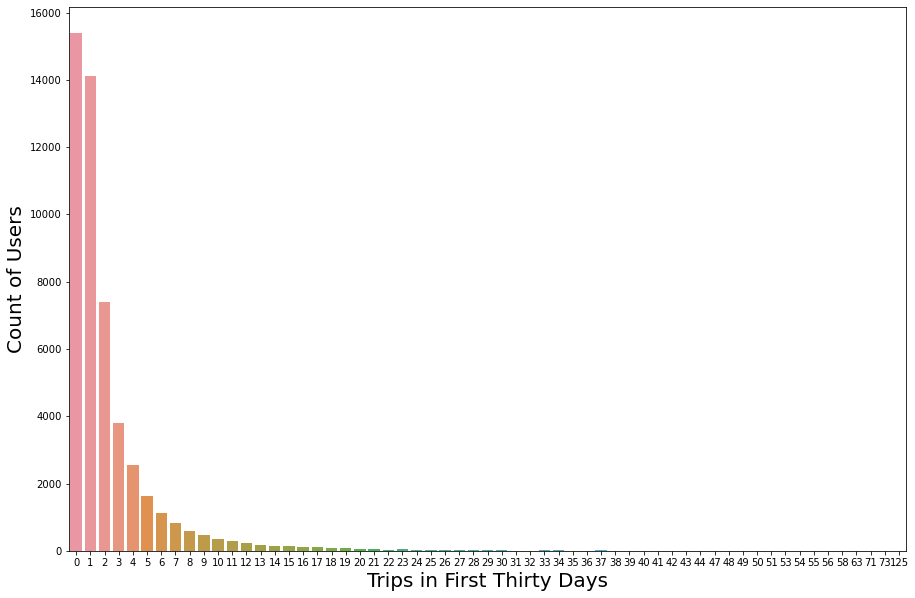

In [49]:
# identify outliers for column trips_in_first_30_days
plt.figure(figsize=(15, 10))
sns.countplot(x='trips_in_first_30_days', data = ultimate_df)
plt.xlabel('Trips in First Thirty Days', fontsize = 20)
plt.ylabel('Count of Users', fontsize=20)
plt.show()

In [50]:
# check the row with the outlier trips_in_first_30_days=125
ultimate_df[ultimate_df.trips_in_first_30_days==125]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
18514,King's Landing,125,2014-01-02,5.0,1.12,2014-06-30,1,14.4,1,72.0,2.02,4.8,1


In [51]:
# remove outlier trips_in_first_30_days = 125
ultimate_df.drop(ultimate_df.index[ultimate_df['trips_in_first_30_days']==125], axis=0, inplace = True)
ultimate_df[ultimate_df['trips_in_first_30_days']==125]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained


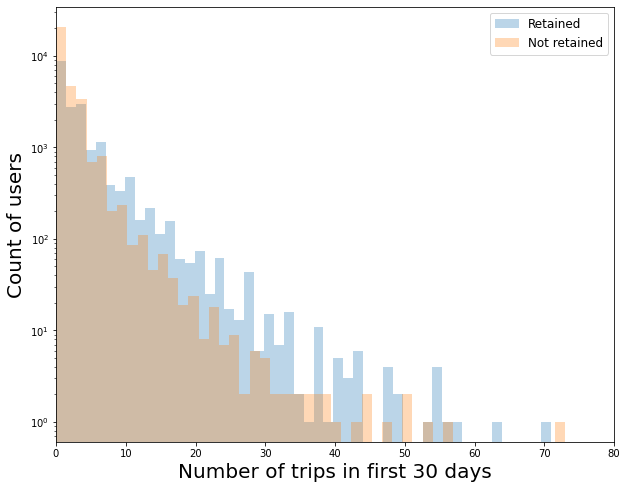

In [52]:
retained = ultimate_df.loc[ultimate_df.retained==1]
not_retained = ultimate_df.loc[ultimate_df.retained==0]
plt.figure(figsize= (10, 8))
plt.hist(retained['trips_in_first_30_days'], bins=50, alpha=0.3, label='Retained')
plt.hist(not_retained['trips_in_first_30_days'], bins=50, alpha=0.3, label='Not retained')
plt.xlabel('Number of trips in first 30 days', fontsize = 20)
plt.ylabel('Count of users', fontsize = 20)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize=12)
plt.show()

In [53]:
# find whether there are big difference between the the means of the following features of the retained users group and 
# non-retained users group
ultimate_df[['avg_rating_of_driver', 'avg_rating_by_driver', 'avg_surge', 'surge_pct', \
             'avg_dist', 'trips_in_first_30_days','weekday_pct','retained']].groupby('retained').mean()

,avg_rating_of_driver,avg_rating_by_driver,avg_surge,surge_pct,avg_dist,trips_in_first_30_days,weekday_pct
retained,,,,,,,
0,4.605985,4.787530,1.075339,8.666739,6.207939,1.658482,60.647032
1,4.593522,4.762841,1.073807,9.152518,5.114953,3.299846,61.388470


In [54]:
ultimate_df.corr()['retained']

trips_in_first_30_days    0.211863
avg_rating_of_driver     -0.010685
avg_surge                -0.003338
phone                     0.007417
surge_pct                 0.011790
ultimate_black_user       0.204976
weekday_pct               0.009685
avg_dist                 -0.092765
avg_rating_by_driver     -0.026830
retained                  1.000000
Name: retained, dtype: float64

conclusion: city, trips_in_first_30_days and ultimate_black_user are the best predictors for retention

In [55]:
ultimate_df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [56]:
ultimate_selected_df = ultimate_df[['city', 'trips_in_first_30_days', 'ultimate_black_user', 'retained']]
ultimate_selected_df.head()

,city,trips_in_first_30_days,ultimate_black_user,retained
0,King's Landing,4,1,1
1,Astapor,0,0,0
2,Astapor,3,0,0
3,King's Landing,9,1,1
4,Winterfell,14,0,0


# 3.3 - Preprocessing

In [57]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [58]:
ultimate_dummies_df = pd.get_dummies(ultimate_selected_df)
ultimate_dummies_df.head()

,trips_in_first_30_days,ultimate_black_user,retained,city_Astapor,city_King's Landing,city_Winterfell
0,4,1,1,0,1,0
1,0,0,0,1,0,0
2,3,0,0,1,0,0
3,9,1,1,0,1,0
4,14,0,0,0,0,1


In [59]:
y = ultimate_dummies_df['retained']
X = ultimate_dummies_df.drop('retained', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [60]:
scaled_trips_in_first_30_days_train = scale(X_train['trips_in_first_30_days'])

In [61]:
X_train_scaled = X_train.drop('trips_in_first_30_days', axis=1). \
                              assign(scaled_trips_in_first_30_days=scaled_trips_in_first_30_days_train)
X_train_scaled.head()

,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,scaled_trips_in_first_30_days
22771,1,1,0,0,0.189731
29814,1,1,0,0,-0.340166
13084,0,1,0,0,1.249526
42948,1,1,0,0,0.189731
23336,0,1,0,0,3.369114


In [62]:
scaled_trips_in_first_30_days_test = scale(X_test['trips_in_first_30_days'])
X_test_scaled = X_test.drop('trips_in_first_30_days', axis=1). \
                             assign(scaled_trips_in_first_30_days=scaled_trips_in_first_30_days_test)
X_test_scaled.head()

,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,scaled_trips_in_first_30_days
1659,1,1,0,0,-0.339482
11477,0,1,0,0,-0.339482
46097,0,0,0,1,-0.609613
19320,1,1,0,0,3.982608
11509,0,0,0,1,-0.339482


# 3.4 Modeling

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [64]:
# logistic regression model
logreg =  LogisticRegression(random_state=123)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [65]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.6951333333333334 


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      9332
           1       0.66      0.39      0.49      5668

    accuracy                           0.70     15000
   macro avg       0.68      0.64      0.64     15000
weighted avg       0.69      0.70      0.67     15000



In [67]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Positive: {} \t False Positive: {} \nTrue Negative: {} \t False Negative: {} '.format(tp, fp, tn, fn))

True Positive: 2218 	 False Positive: 1123 
True Negative: 8209 	 False Negative: 3450 


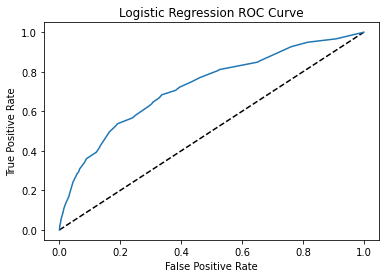

In [68]:
y_pred_prob = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [69]:
# Extract coefficients.
coefs = pd.Series(logreg.coef_.reshape(-1), index=X_train_scaled.columns)
# Sort by absolute values of coefficients.
coefs = coefs[coefs.abs().sort_values(ascending=False).index]
print(coefs)

city_Astapor                    -0.866806
ultimate_black_user              0.865042
city_King's Landing              0.751972
scaled_trips_in_first_30_days    0.494458
city_Winterfell                 -0.427728
dtype: float64


In [70]:
#Random Forest Classifier
clf = RandomForestClassifier(random_state=123, n_jobs = -1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Random Forest Classifier:  Accutacy = {}'.format(accuracy_score(y_test, y_pred)))

Random Forest Classifier:  Accutacy = 0.7127333333333333


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9332
           1       0.66      0.49      0.56      5668

    accuracy                           0.71     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.71      0.70     15000



Confusion matrix, without normalization
[[7901 1431]
 [2878 2790]]


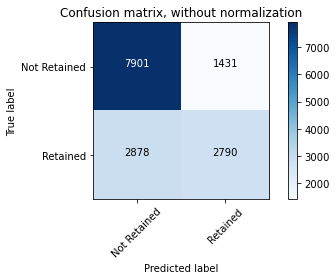

In [72]:
#plot confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Retained', 'Retained'], \
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')


In [73]:
# feature_importance 
pd.Series(clf.feature_importances_, X.columns).sort_values(ascending = False)


trips_in_first_30_days    0.409394
city_King's Landing       0.281835
ultimate_black_user       0.203836
city_Astapor              0.068395
city_Winterfell           0.036539
dtype: float64

Conclusion: The three most important features are how many trips made in the first 30 days, whether the user signed up in King's Landing,  and whether the user is a Ultimate Black User in predicting whether a user will be retained in his/her 6th month on the system